In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
papers_df = pd.read_csv('../Data/Papers - After Content Filter.csv')
print(f"Total de papers: {papers_df.shape[0]}")

Total de papers: 145


## Overall Analysis

Text(0.5, 1.0, 'Number of papers by year')

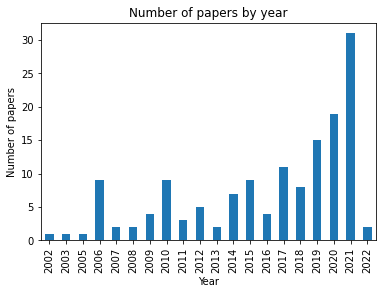

In [3]:
papers_df['Year'] = papers_df['Year'].astype('int')
papers_df.groupby('Year').count()['Title'].plot.bar()
plt.ylabel('Number of papers')
plt.title('Number of papers by year')

Text(0.5, 0, 'Number of citations')

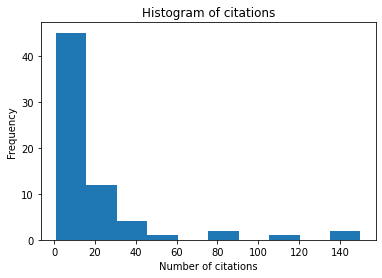

In [4]:
papers_df['Citations'].plot.hist()
plt.title('Histogram of citations')
plt.xlabel('Number of citations')

## Optimization Methodology

Number of evolutionary papers: 122


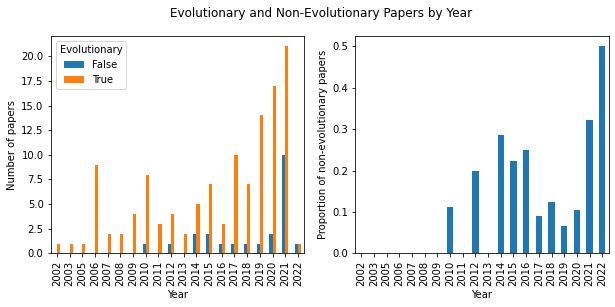

In [5]:
papers_df['Evolutionary'] = False
for index, row in papers_df.iterrows():
    if 'Evolutionary' in row['Optimization'] or 'Evolutive' in row['Optimization']:
        papers_df.loc[index,'Evolutionary'] = True

print(f"Number of evolutionary papers: {papers_df[papers_df['Evolutionary']==True].shape[0]}")

evol_year = papers_df.groupby('Evolutionary').Year.value_counts().unstack(0)
evol_year = evol_year.fillna(0)

df_stack = evol_year.apply(lambda x:x/sum(x),axis=1)

fig, axs = plt.subplots(1, 2, figsize=(10,4))

evol_year.plot.bar(ax=axs[0])
axs[0].set_ylabel('Number of papers')

df_stack[False].plot.bar(ax=axs[1])
axs[1].set_ylabel('Proportion of non-evolutionary papers')

fig.suptitle('Evolutionary and Non-Evolutionary Papers by Year')
plt.show()

In [16]:
opt_set = []
for index, row in papers_df.iterrows():
    row['Optimization'] = ast.literal_eval(row['Optimization'])
    opt_set.extend(row['Optimization'])

opt_dict = {item:opt_set.count(item) for item in opt_set}

list_pop_opt = ['Evolutionary','Deterministic','Genetic']
for key in list_pop_opt:
    opt_dict.pop(key)

print(f"Different Optimization Algorithms: {len(opt_dict)}")

opt_df = pd.DataFrame(data={'Algorithm': opt_dict.keys(), 'Quantity': opt_dict.values()}).sort_values('Quantity', ascending = False)
print(f"Top 10 most used algorithms:")
print(f"{opt_df.head(10)}")

Different Optimization Algorithms: 73
Top 10 most used algorithms:
                      Algorithm  Quantity
3                       NSGA-II        48
10  Particle Swarm Optimization         8
16                       MOEA/D         7
5                         SPEA2         4
65               Gradient based         3
2                          NSGA         3
42                     Bayesian         3
43                    MO-CMA-ES         2
54                         MGDA         2
20                    Heuristic         2


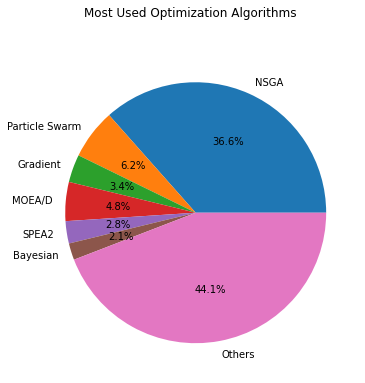

In [46]:
opt_group = {'NSGA': opt_dict['NSGA']+opt_dict['NSGA-II']+opt_dict['NSGA-III'],
            'Particle Swarm': opt_dict['Particle Swarm']+opt_dict['Particle Swarm Optimization'],
            'Gradient': opt_dict['Gradient']+opt_dict['Gradient based']+opt_dict['Gradient-based'],
            'MOEA/D': opt_dict['MOEA/D'],
            'SPEA2': opt_dict['SPEA2'],
            'Bayesian': opt_dict['Bayesian']
            }
            
opt_group['Others'] = papers_df.shape[0]-sum(opt_group.values())
opt_group_df = pd.DataFrame(data={'Algorithm': opt_group.keys(), 'Quantity': opt_group.values()})

fig = plt.figure(figsize=(6,6))
plt.pie(opt_group_df['Quantity'], labels=opt_group_df['Algorithm'], autopct='%1.1f%%')
fig.set_facecolor('white')
fig.suptitle('Most Used Optimization Algorithms')
fig.show()

In [65]:
non_evo_opt = []
for index, row in papers_df[papers_df['Evolutionary']==False].iterrows():
    non_evo_opt.extend(ast.literal_eval(row['Optimization']))

nevo_opt_dict = {item:non_evo_opt.count(item) for item in non_evo_opt}
nevo_opt_dict.pop('Deterministic')

nevo_opt_dict['Gradient'] = nevo_opt_dict['Gradient']+nevo_opt_dict['Gradient based']+nevo_opt_dict['Gradient-based']
nevo_opt_dict.pop('Gradient based')
nevo_opt_dict.pop('Gradient-based')

print(f"Different Non-Evolutionary Optimization Algorithms: {len(nevo_opt_dict)}")

nevo_opt_df = pd.DataFrame(data={'Algorithm': nevo_opt_dict.keys(), 
                                'Quantity': nevo_opt_dict.values()}).sort_values('Quantity', ascending = False)
print(f"Top 10 most used algorithms:")
print(f"{nevo_opt_df.head(10)}")

Different Non-Evolutionary Optimization Algorithms: 27
Top 10 most used algorithms:
                     Algorithm  Quantity
16                    Gradient         5
3                    Heuristic         2
15                        MGDA         2
0    ε-Constraint Optimization         1
14                        NISE         1
25       Iterated local search         1
24                 MO-ParamILS         1
23        Linear scalarization         1
22       Adaptively Scalarized         1
21  steepest descent algorithm         1


## Single vs Multiple Solutions

In [76]:
multi_qtd = papers_df[(papers_df['Single/Multi Solutions']=='Multi') | (papers_df['Single/Multi Solutions']=='Multi?')].shape[0]
print(f"Quantity of papers which find multiple solutions: {multi_qtd}")
print(f"Quantity of papers which find a single solution: {papers_df.shape[0]-multi_qtd}")

Quantity of papers which find multiple solutions: 78
Quantity of papers which find a single solution: 67


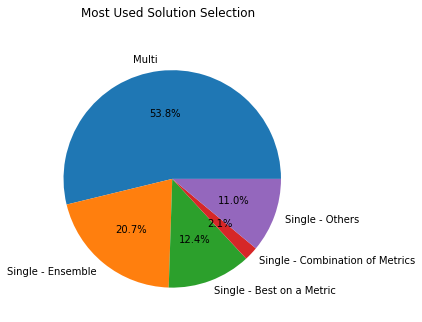

In [97]:
selec_dict = {'Multi': ['Multi', 'Multi?'],
            'Single - Ensemble': ['Single - Ensemble'],
            'Single - Best on a Metric': ['Single - Solution that performs best in supervised',
                                            'Single - AIC in Pareto fronteir',
                                            'Single - Performance in training',
                                            'Single - Information Criteria',
                                            'Single - ARI value',
                                            'Single - Separation Margin',
                                            'Single - Minkowski Score',
                                            'Single - Highest F-measure',
                                            'Single - Performance in validation',
                                            'Single - Prior Knowledge',
                                            'Single - Max number of features',
                                            'Single - Accuracy in Validation', 'Single - Optimize RMSE',
                                            'Single - Largest f1',
                                            'Single - Crowding distance', 
                                            'Single - Max crowding-distance',
                                            'Single - Maximum fitness value'],
            'Single - Combination of Metrics': ['Single - Model with highiest sum of objectives',
                                                'Single - Payoff function',
                                                'Single - Weighted optimization']
            }

selec_qtd = {}

for key in selec_dict.keys():
    selec_qtd[key] = papers_df['Single/Multi Solutions'].isin(selec_dict[key]).sum()

selec_qtd['Single - Others'] = papers_df.shape[0]-sum(selec_qtd.values())

fig = plt.figure(figsize=(5,5))
plt.pie(selec_qtd.values(), labels=selec_qtd.keys(), autopct='%1.1f%%')
fig.set_facecolor('white')
fig.suptitle('Most Used Solution Selection')
fig.show()